In [1]:
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import keras.callbacks as callbacks

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from numpy import genfromtxt
import retinaMethods as rm
import kappa_methods as kappa
from generators import (BatchGenerator , ValidationGenerator, OriginalDataGenerator)
import paths_file

#Data info
mean_RGB = [100.009405273 ,100.227072634 , 100.786751717] 
std_RGB = [84.3177751745 , 84.2576168412, 84.4614340298]


#Network parameters
nb_classes = 5
# input image dimensions
img_rows = img_cols = 512
layers = 3

input_shape = (layers, img_rows, img_cols)


Using Theano backend.
Using gpu device 0: GeForce GTX 980 Ti (CNMeM is disabled, cuDNN 4007)


In [2]:
from keras.models import model_from_json

#Load a existing model architecture
filepath= paths_file.json_models_path + str("Json2016-11-17-BEST.txt")  #CHANGE FILE !!

with open(filepath, 'r') as myfile:
    json_string=myfile.read()
    
model = model_from_json(json_string)


In [3]:
from keras.models import load_model

from kappa_methods import quad_kappa
# model = load_model("/home/maria.alvarez/mountedData/trainedModels/model_2016-11-07 15:50:44")

#load Weights 
weights = paths_file.net_weights_path  + str("final_2016-11-17_kappa_test_0.70.hdf5")

#load Weights 
model.load_weights(weights)

In [5]:
#Kappa fot a set of 100 Test IMAGES
import numpy as np
import os
import retinaMethods as rm

testPath = paths_file.test_processed_path
X_test = np.load(os.path.join(testPath, "images_200.npy"))  
y_test = np.load(os.path.join(testPath, "labels_200.npy")) 

#Get network output
# proba = model.predict_proba(X_test  ,  batch_size = 10)
#print(proba)
#Get correspongig lable to the output
classes = model.predict_classes(X_test  ,  batch_size = 100)

k = kappa.kappa(y_test , classes , nb_classes)

print("Kappa: " + str(k))

99/99 [==============================] - 2s
Kappa: 0.756583127867


In [6]:
classes

array([0, 0, 0, 2, 3, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, 4, 3, 3, 3, 0, 0, 3, 3, 0,
       0, 1, 1, 0, 1, 2, 0, 2, 2, 4, 3, 0, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 4, 3, 0, 0, 1, 1, 1, 0, 0, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 0, 0])

In [7]:
 np.load(os.path.join(testPath, "labels_200.npy")) 

array([0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 4, 2, 2, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 0], dtype=uint8)

In [6]:
#Kappa for all the images

pred_classes = np.array([]).astype('int')
y_test = np.array([]).astype('int')


testPath = paths_file.test_processed_path

all_imag = [f for f in os.listdir(testPath) if f.startswith('i')]
all_label = [f for f in os.listdir(testPath) if f.startswith('l')]

#Sort the files names to be according with the labeling file
rm.sort_nicely(all_imag) 
rm.sort_nicely(all_label) 

all_imag_test = all_imag
all_label_test = all_label


# testPath = "/home/maria.alvarez/mountedData/numpyArrTest"

# all_imag_test = [f for f in os.listdir(testPath) if f.startswith('i')]
# all_label_test = [f for f in os.listdir(testPath) if f.startswith('l')]

# #Sort the files names to be according with the labeling file
# rm.sort_nicely(all_imag_test) 
# rm.sort_nicely(all_label_test) 

# #Take the las 40 packages (~100imges/package)... 
# #Choosen this because this have a classes distribution similar to the test distribution
# all_imag_test = all_imag_test[-40:] 
# all_label_test = all_label_test[-40:] 
    

print("Initial time: " , datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

for i in xrange(len(all_imag_test)):
          
    #Read set of data
    X_test = np.load(os.path.join(testPath, all_imag_test[i]))
    
    y_test = np.append(y_test , np.load(os.path.join(testPath, all_label_test[i])), axis = 0)
    
    #Get correspongig lable to the output
    pred_classes = np.append(pred_classes, model.predict_classes(X_test ,  batch_size = 1000), axis = 0)

    del(X_test)
            
print("End time: " , datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        
k = kappa.kappa(y_test , pred_classes ,nb_classes)

print("Kappa Test: " + str(k))

('Initial time: ', '2016-11-15 11:12:52')
76/76 [==============================] - 1s
('End time: ', '2016-11-15 11:44:59')
Kappa Test: 0.355053384013


In [7]:
print(pred_classes)

labelsNum = pred_classes
prob = []
print(" pred distribution:")
for k in range(5):
    print(np.sum(labelsNum==k)/float(labelsNum.size)*100)
    prob.append(np.sum(labelsNum==k)/float(labelsNum.size))
    
prob = np.array(prob)

[1 0 0 ..., 0 0 3]
 pred distribution:
36.0191166038
36.6949184184
19.773737072
4.41324720905
3.09898069671


In [8]:
#Kappa the validation images of training 

testPath = paths_file.train_processed_path

all_imag = [f for f in os.listdir(testPath) if f.startswith('i')]
all_label = [f for f in os.listdir(testPath) if f.startswith('l')]

#Sort the files names to be according with the labeling file
rm.sort_nicely(all_imag) 
rm.sort_nicely(all_label) 

#Take the las 40 packages (~100imges/package)... 
#Choosen this because this have a classes distribution similar to the test distribution
all_imag_test = all_imag_test[-40:] 
all_label_test = all_label_test[-40:] 


pred_classes = np.array([]).astype('int')
y_test = np.array([]).astype('int')


for i in xrange(len(all_imag)):
          
    #Read set of data
    X_test = np.load(os.path.join(testPath, all_imag[i]))
    
    y_test = np.append(y_test , np.load(os.path.join(testPath, all_label[i])), axis = 0)
    
    #Get correspongig lable to the output
    pred_classes = np.append(pred_classes, model.predict_classes(X_test  ,  batch_size = 100 ), axis = 0)

    del(X_test)
            
k = kappa.kappa(y_test , pred_classes ,nb_classes)

print("Kappa Train: " + str(k))

26/26 [==============================] - 0s
Kappa Train: 0.440661584562


In [9]:
import os
import retinaMethods as rm
path = paths_file.train_processed_path
all_imag = [f for f in os.listdir(path) if f.startswith('i')]
all_label = [f for f in os.listdir(path) if f.startswith('l')]

#Sort the files names to be according with the labeling file
rm.sort_nicely(all_imag) 
rm.sort_nicely(all_label) 

X_train = np.load(os.path.join(path, all_imag[0]))

X_train.shape

(100, 3, 512, 512)

# Transformations

In [10]:
import numpy as np
np.random.rand()
import random

probAug = 0.5
percentTake = 0.25
if(np.random.rand() < probAug):
    modifInd = random.sample(range(X_train.shape[0]), int(np.ceil(X_train.shape[0]*percentTake)))
#     print(modifInd)
    #Choose transformaition
    for i in np.arange(len(modifInd)):
        tranf = random.randint(0, 2)

        if tranf == 0:
            #Make horizontal flip
            print("Horizontal")
            X_train[modifInd[i]] =  np.fliplr(X_train[modifInd[i]])
        elif tranf == 1:
            #Make vertical flip
            print("Vertical")
            X_train[modifInd[i]] =  np.flipud(X_train[modifInd[i]])
        else:
            print("Horizontal-Vertical")
            #make horizontal - vertical flip
            X_train[modifInd[i]] =  np.fliplr(X_train[modifInd[i]])
            X_train[modifInd[i]] =  np.flipud(X_train[modifInd[i]])

#         plt.imshow(np.rollaxis(X_train[modifInd[i]],0,3))
#         plt.show()

    
    

In [11]:
import numpy as np
np.random.rand()
import random


for i in np.arange(X_train.shape[0]):
    tranf = random.randint(0, 5) #Choose a random between 6 numbers, whith the first 3 theres is a transformation but with the rest is not

    if tranf == 0:
        #Make horizontal flip
#         print("Horizontal")
        X_train[i] =  np.fliplr(X_train[i])
    elif tranf == 1:
        #Make vertical flip
#         print("Vertical")
        X_train[i] =  np.flipud(X_train[i])
    elif tranf == 2:
#         print("Horizontal-Vertical")
        #make horizontal - vertical flip
        X_train[i] =  np.fliplr(X_train[i])
        X_train[i] =  np.flipud(X_train[i])

#         plt.imshow(np.rollaxis(X_train[modifInd[i]],0,3))
#         plt.show()

    
    

('imgArray shape:', (2336, 3504, 3))


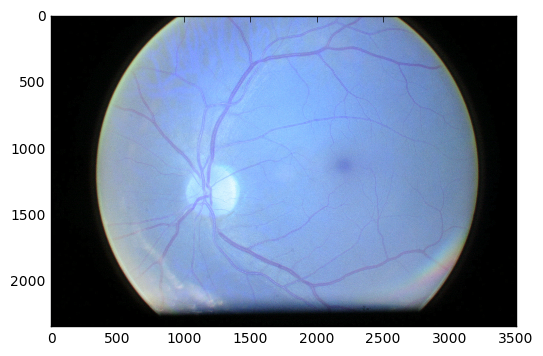

In [2]:
#Open CV library to binarize the image
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import *


#Matplot library for ploting and showing data
import matplotlib.pyplot as plt
#Plote in the same line the graps (instead of in a new windows)
%matplotlib inline

matplotlib.pyplot.close("all")

test_img = paths_file.sample_kaggle_path + str("100_right.jpeg")
#Read the image as a numpy array
imgArray = cv2.imread(test_img)
print ("imgArray shape:", imgArray.shape)
plt.imshow(imgArray)
plt.show()


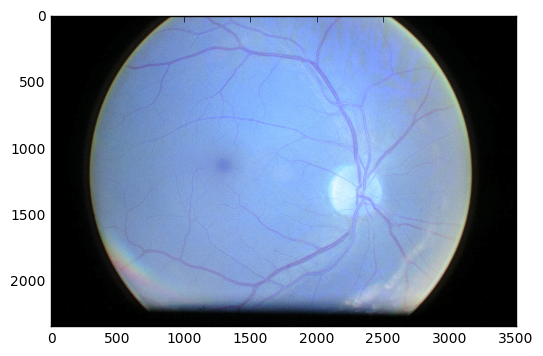

In [14]:
imgArray = np.fliplr(imgArray)

plt.imshow(imgArray)
plt.show()


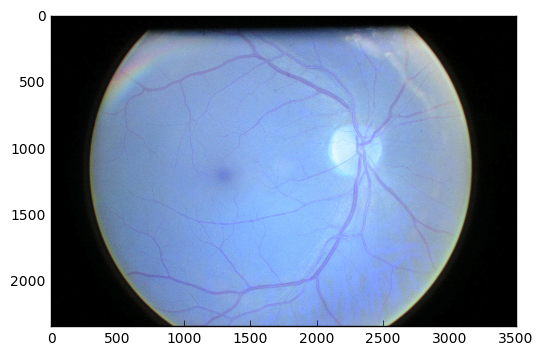

In [15]:
imgArray = np.flipud(imgArray) #np.fliplr(imgArray)

plt.imshow(imgArray)
plt.show()


In [16]:
#-------------------------------------------------------------
#Random rotation Keras methods
import scipy.ndimage as ndi

def random_rotation(x, rg, row_index=1, col_index=2, channel_index=0,
                    fill_mode='nearest', cval=0.):
    theta = np.pi / 180 * np.random.uniform(-rg, rg)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_index], x.shape[col_index]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_index, fill_mode, cval)
    return x

def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
    return transform_matrix

def apply_transform(x, transform_matrix, channel_index=0, fill_mode='nearest', cval=0.):
    x = np.rollaxis(x, channel_index, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                      final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_index+1)
    return x
#-------------------------------------------------------------


In [17]:
imgArray=imgArray[:,:,::-1]

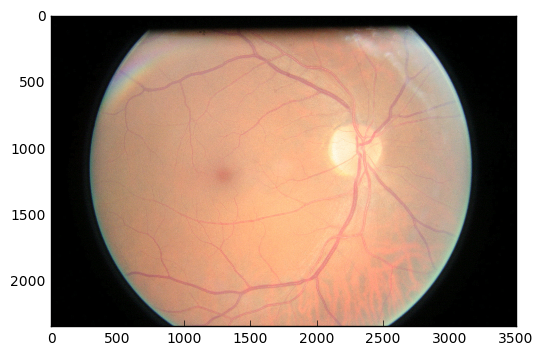

In [18]:
plt.imshow(imgArray)
plt.show()


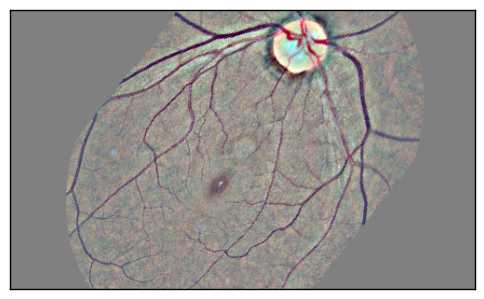

(300, 500, 3)

In [74]:
x = random_rotation(imgg4, 360 ,fill_mode = 'constant', cval=128 , col_index=1, channel_index = 2 , row_index=0)

plt.imshow(x), plt.xticks([]),plt.yticks([])
plt.show()
x.shape

(100, 3, 512, 512)
uint8


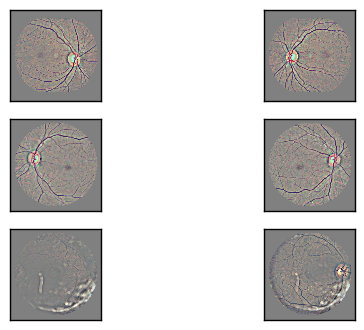

In [3]:

from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from PIL import Image
import cv2
import cv2.cv as cv
import math


#LOAD THE DATA (IMAGES AND LABELS)

savePath = paths_file.test_processed_path


#Plot Some images
#-----------------------------------------------------------------
#Read np array
array = np.load(savePath+"/images_1.npy")
print(array.shape)   
print(array.dtype)   

amIm = 6
offset= 70 

for i in xrange(amIm):
    imgg = array[i+offset,:,:,:]
    #print(imgg.shape)
    imgg4 = np.rollaxis(imgg,0,3) #Roll axis to had the form RowxColxLay
    #print(imgg4.shape)
    imgg4 = imgg4[:,:,::-1] #RBG to RGB
    plt.subplot(math.ceil(amIm/2.0),2,i+1),plt.imshow(imgg4)
    plt.xticks([]),plt.yticks([])